# Dimensionality Reduction Project

the goal of the project:

perform the dimensionality reduction (PCA) on the MNIST dataset.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

## 3.10 

In [4]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_new=pca.fit_transform(mnist["data"])

In [13]:
comp=pca.components_
show=X_new[0][:144]
X_reduced=pca.inverse_transform(X_new)

In [18]:
X_check=X_new.dot(comp.T.T)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


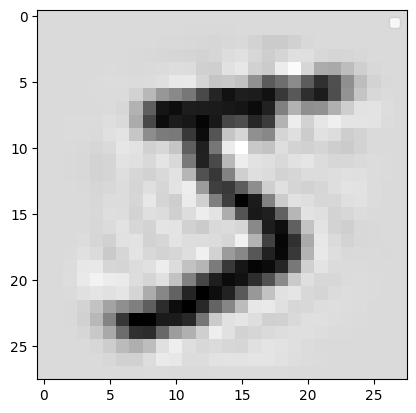

In [16]:
plt.imshow(X_reduced[0].reshape(28, 28), cmap=mpl.cm.binary)
plt.legend()

(-0.5, 27.5, 27.5, -0.5)

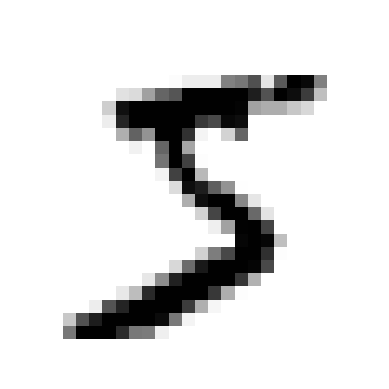

In [7]:
before=mnist["data"][0].reshape(28, 28)
plt.imshow(before, cmap=mpl.cm.binary)
plt.axis("off")

## 4.10

In [21]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(mnist["data"])

PCA()

In [29]:
np.argmax(np.cumsum(pca.explained_variance_ratio_)>0.95) # they are already sorted form highest to lowest! 

153

In [31]:
#153 is i the array, -> 154 components (counting with 0)

In [32]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(mnist["data"])

In [ ]:
X_reduced.shape

(70000, 154)

### how good is it?

In [34]:
X_recovered=pca.inverse_transform(X_reduced)

In [36]:
from sklearn.metrics import mean_squared_error as mse

mse(mnist.data, X_recovered)

217.2172621387621

### classifier without dim. reduction

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(mnist.data, mnist.target, test_size=10000)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rand_clf=RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
from sklearn.metrics import accuracy_score as acc, precision_score as pre
y_pred=rand_clf.predict(X_test)
acc(y_test, y_pred)

0.9677

### classifier with reduced dimensions dataset

In [44]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r=train_test_split(X_reduced, mnist.target, test_size=10000)

In [46]:
##second classifier
rand2_clf=RandomForestClassifier(n_estimators=100)
rand2_clf.fit(X_train_r, y_train_r)

RandomForestClassifier()

In [47]:
y_pred_r=rand2_clf.predict(X_test_r)
acc(y_test_r, y_pred_r)

0.9537

lower accuracy with the reduced dataset, because there is less data (logically)

### Ex.10 (dimensionality reduciton - t-SNE)

In [52]:
###data:

X=mnist["data"][:10000]
y=mnist.target[:10000]

In [54]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, random_state=42)  #2 dimensions, since we want to visualise i
X_reduced=tsne.fit_transform(X)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [56]:
X_reduced

array([[ 41.938377 ,   2.8834972],
       [ 48.862514 , -36.61134  ],
       [ 37.866386 ,  64.25208  ],
       ...,
       [-15.266414 , -59.391216 ],
       [ 20.073652 ,  35.793877 ],
       [-38.29886  ,  59.423008 ]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


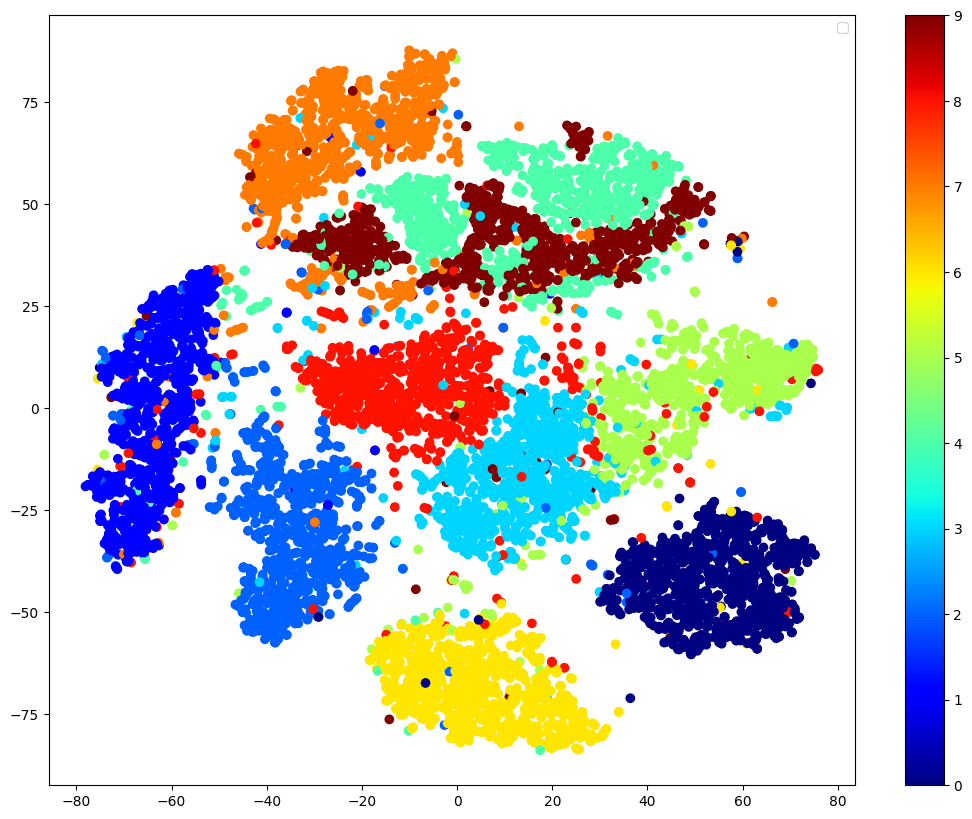

In [65]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y, cmap="jet")
plt.legend()
plt.colorbar()

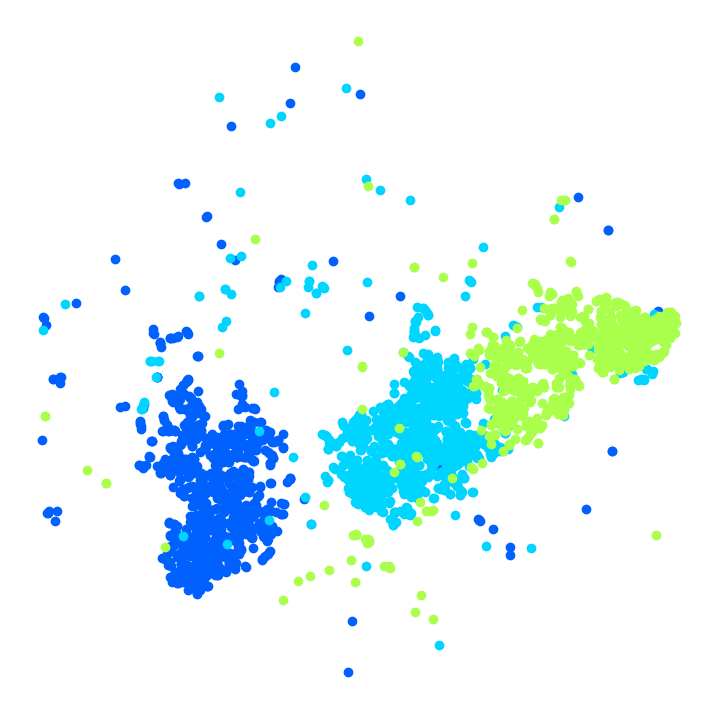

In [66]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

### plot everything with iamges

In [79]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    #plotting evertything
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    #plt.axis("off")
    #annotating:
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

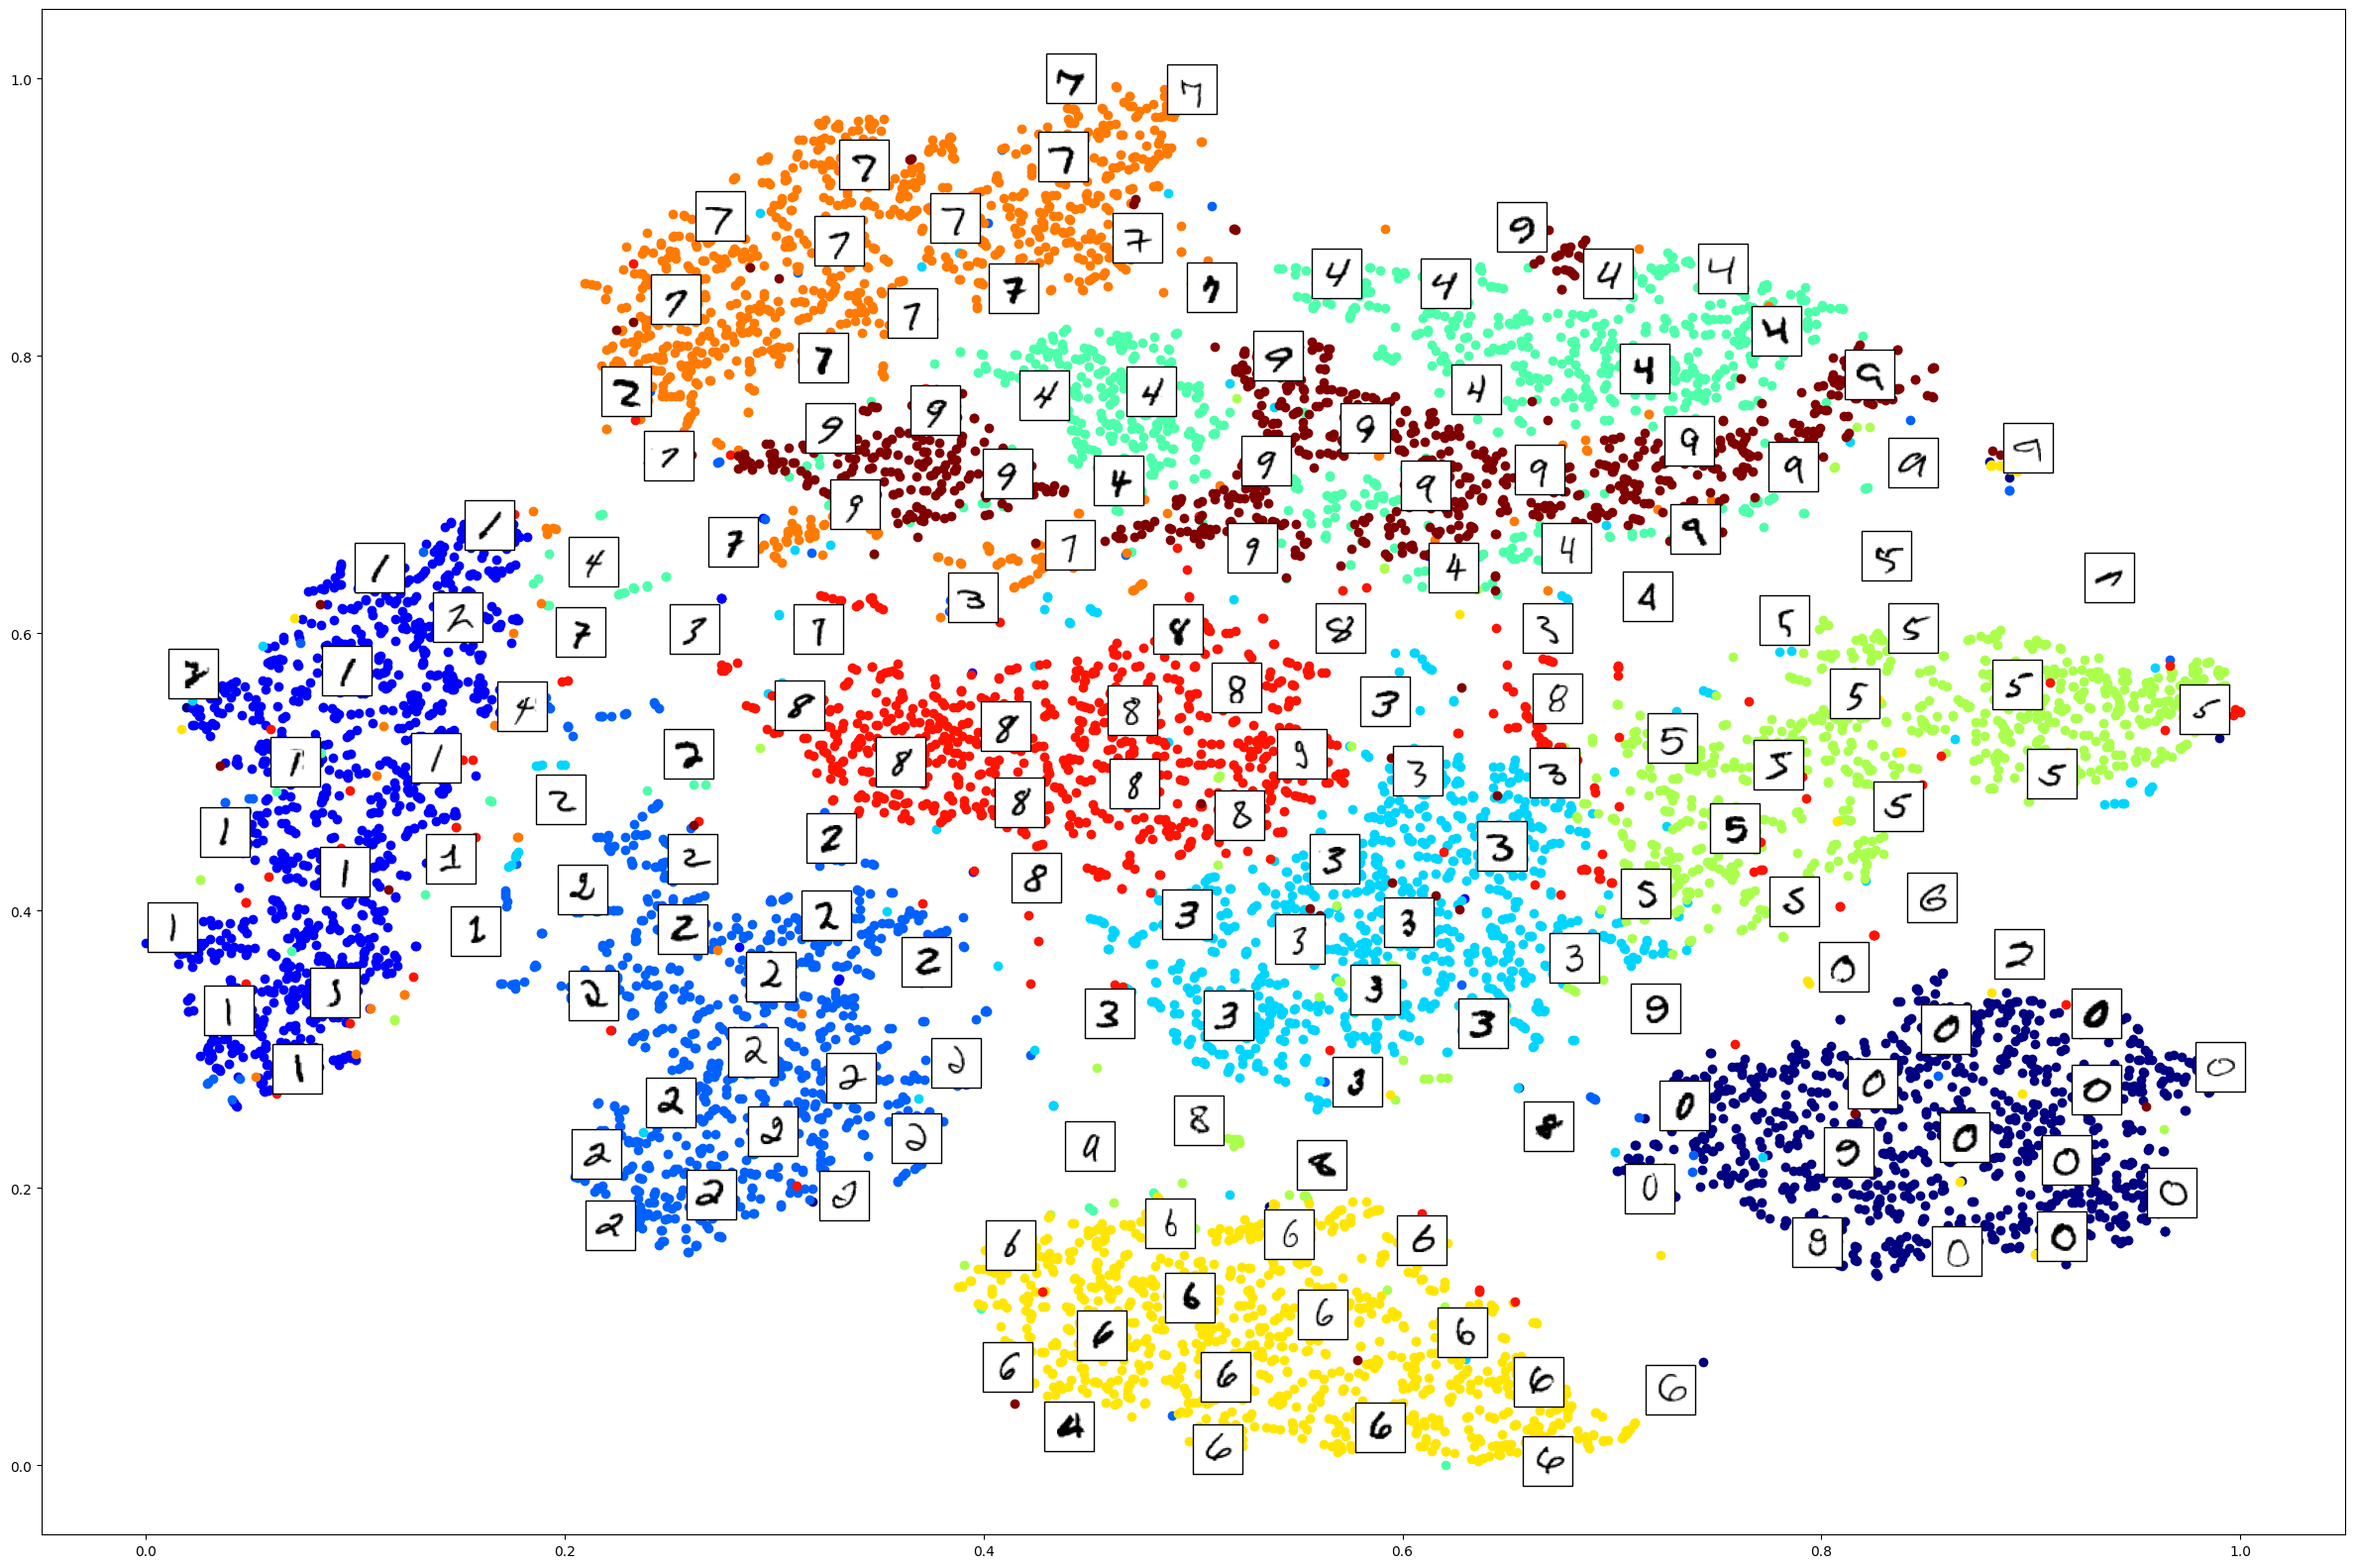

In [81]:
plot_digits(X_reduced,y,images=X, figsize=(30,20))

### PCA ;LLE MDS


In [83]:
from sklearn.decomposition import PCA
import time

pca=PCA(n_components=2)
t0=time.time()
X_pca=pca.fit_transform(X)
t1=time.time()
print("Time: {:.2f}".format(t1-t0))

Time: 0.24


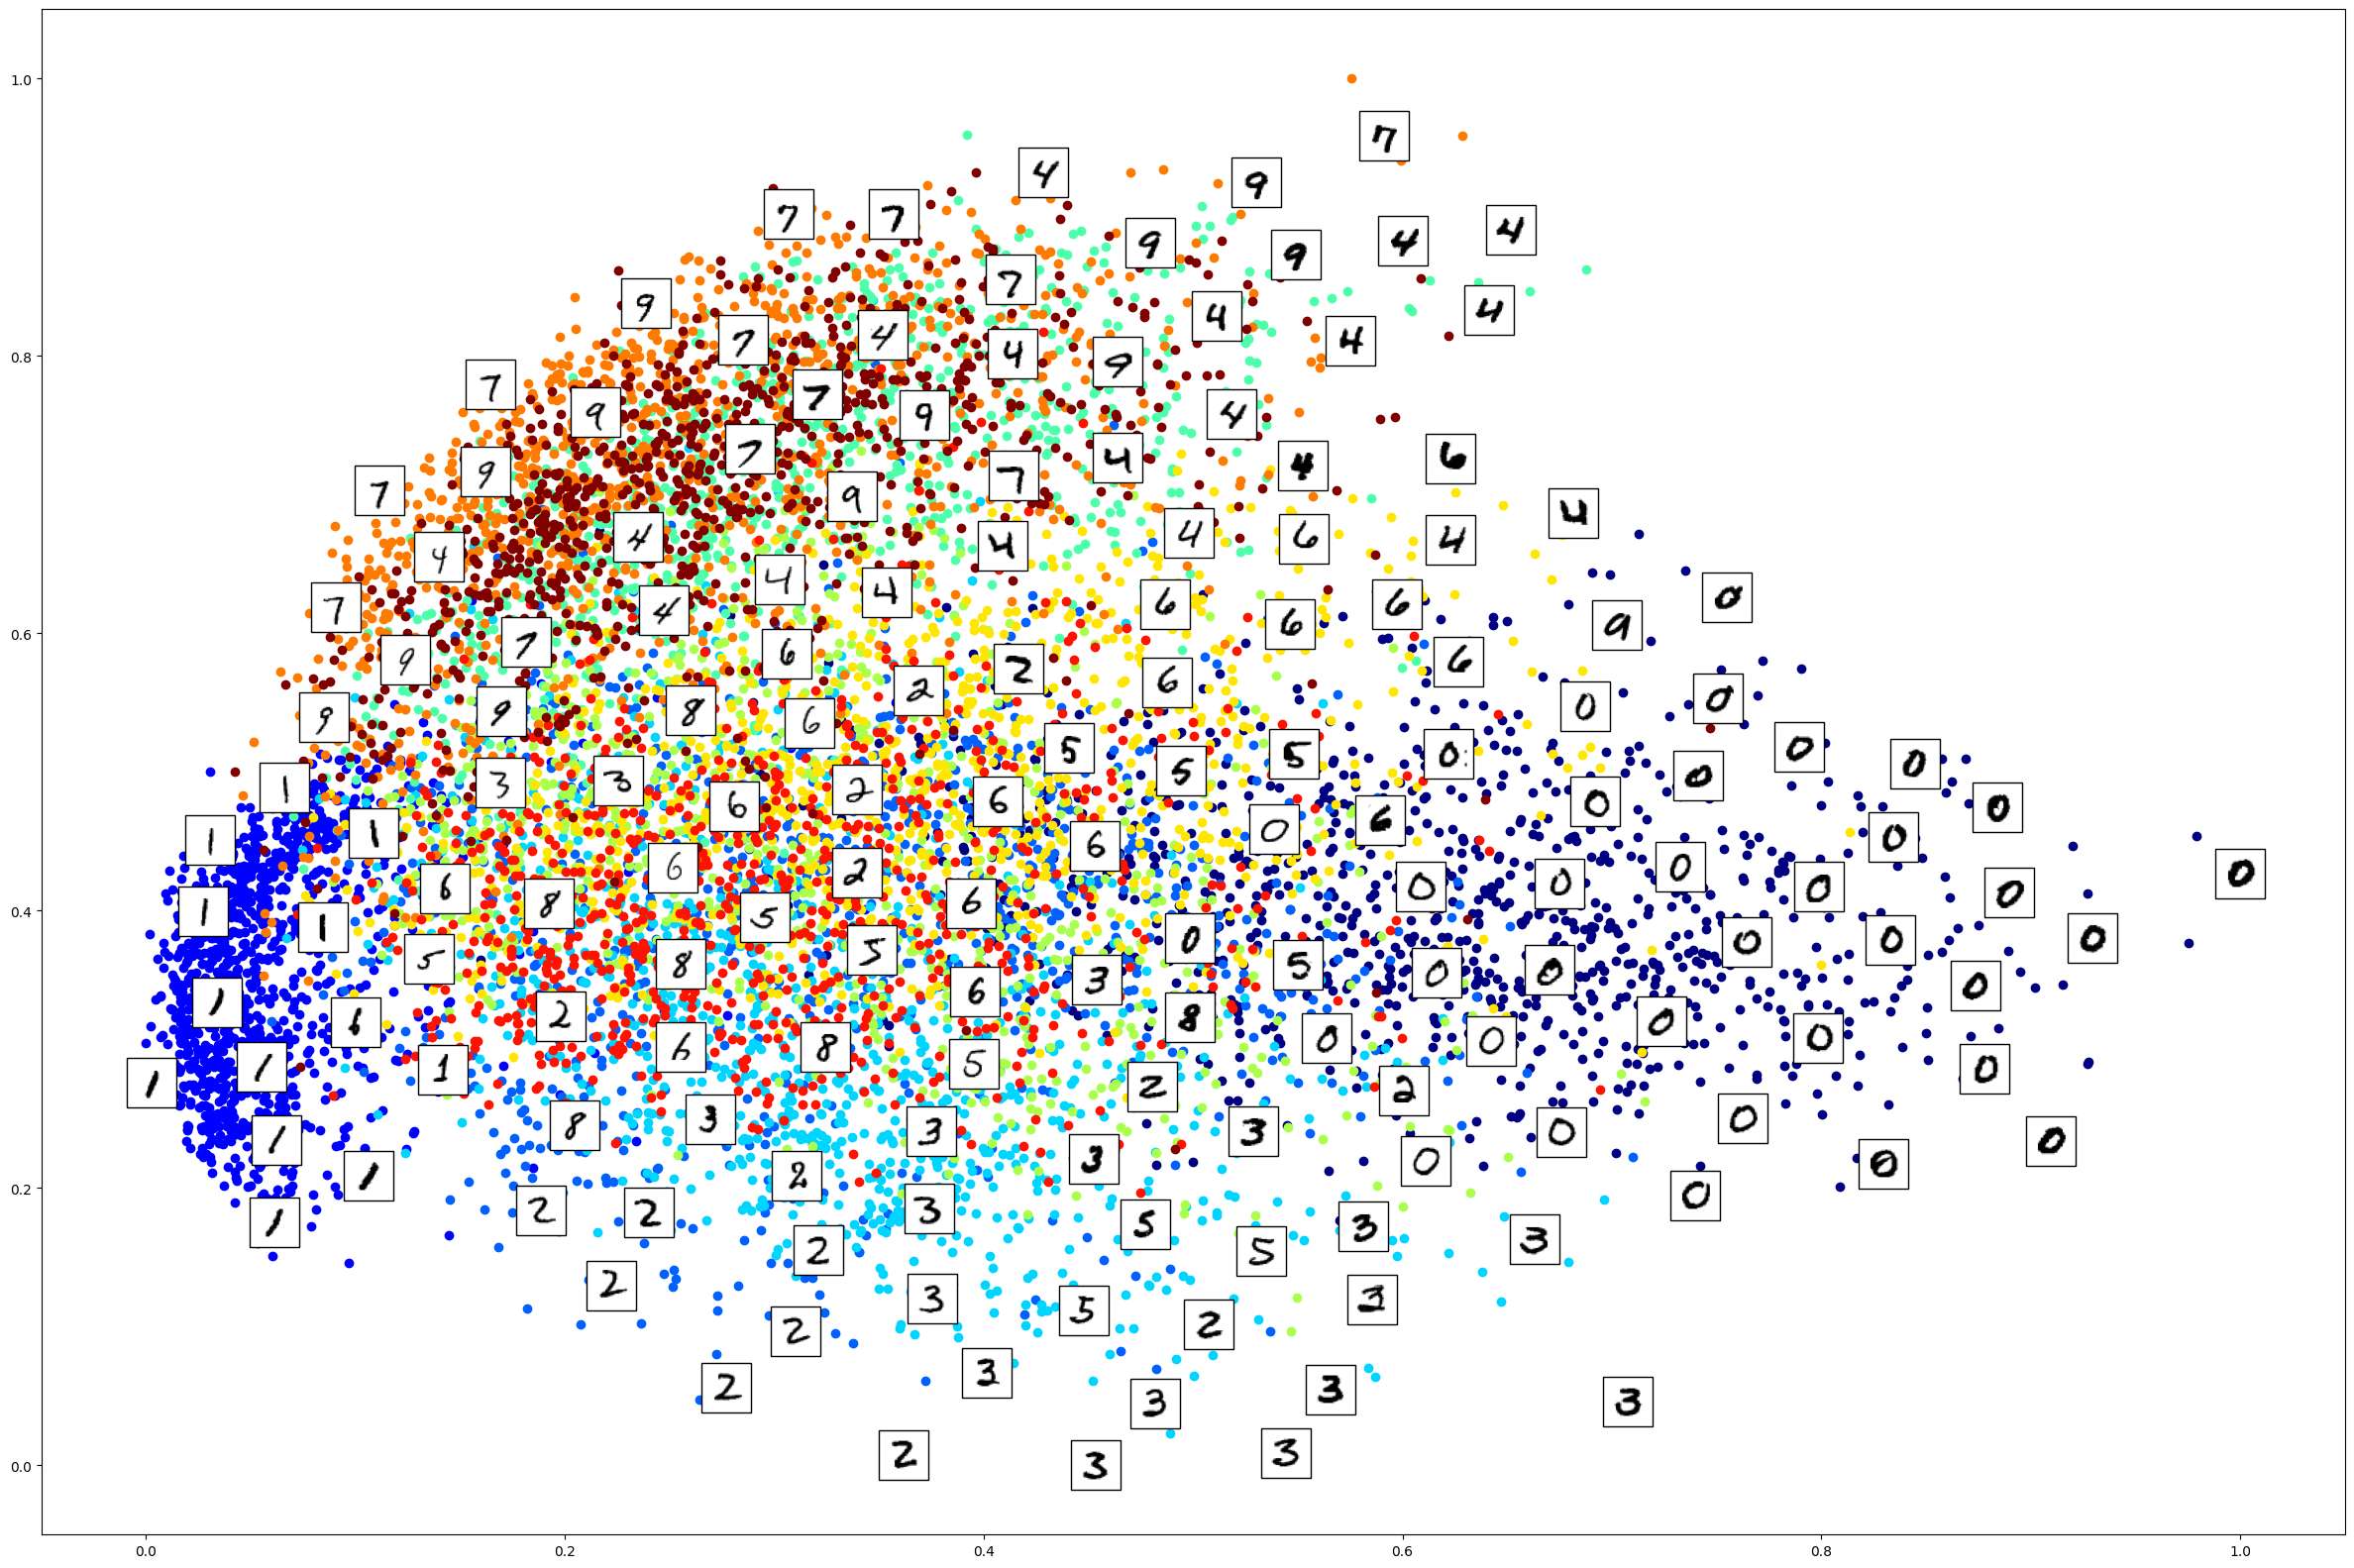

In [85]:
plot_digits(X_pca,y, images=X, figsize=(30,20))

Time: 33.51


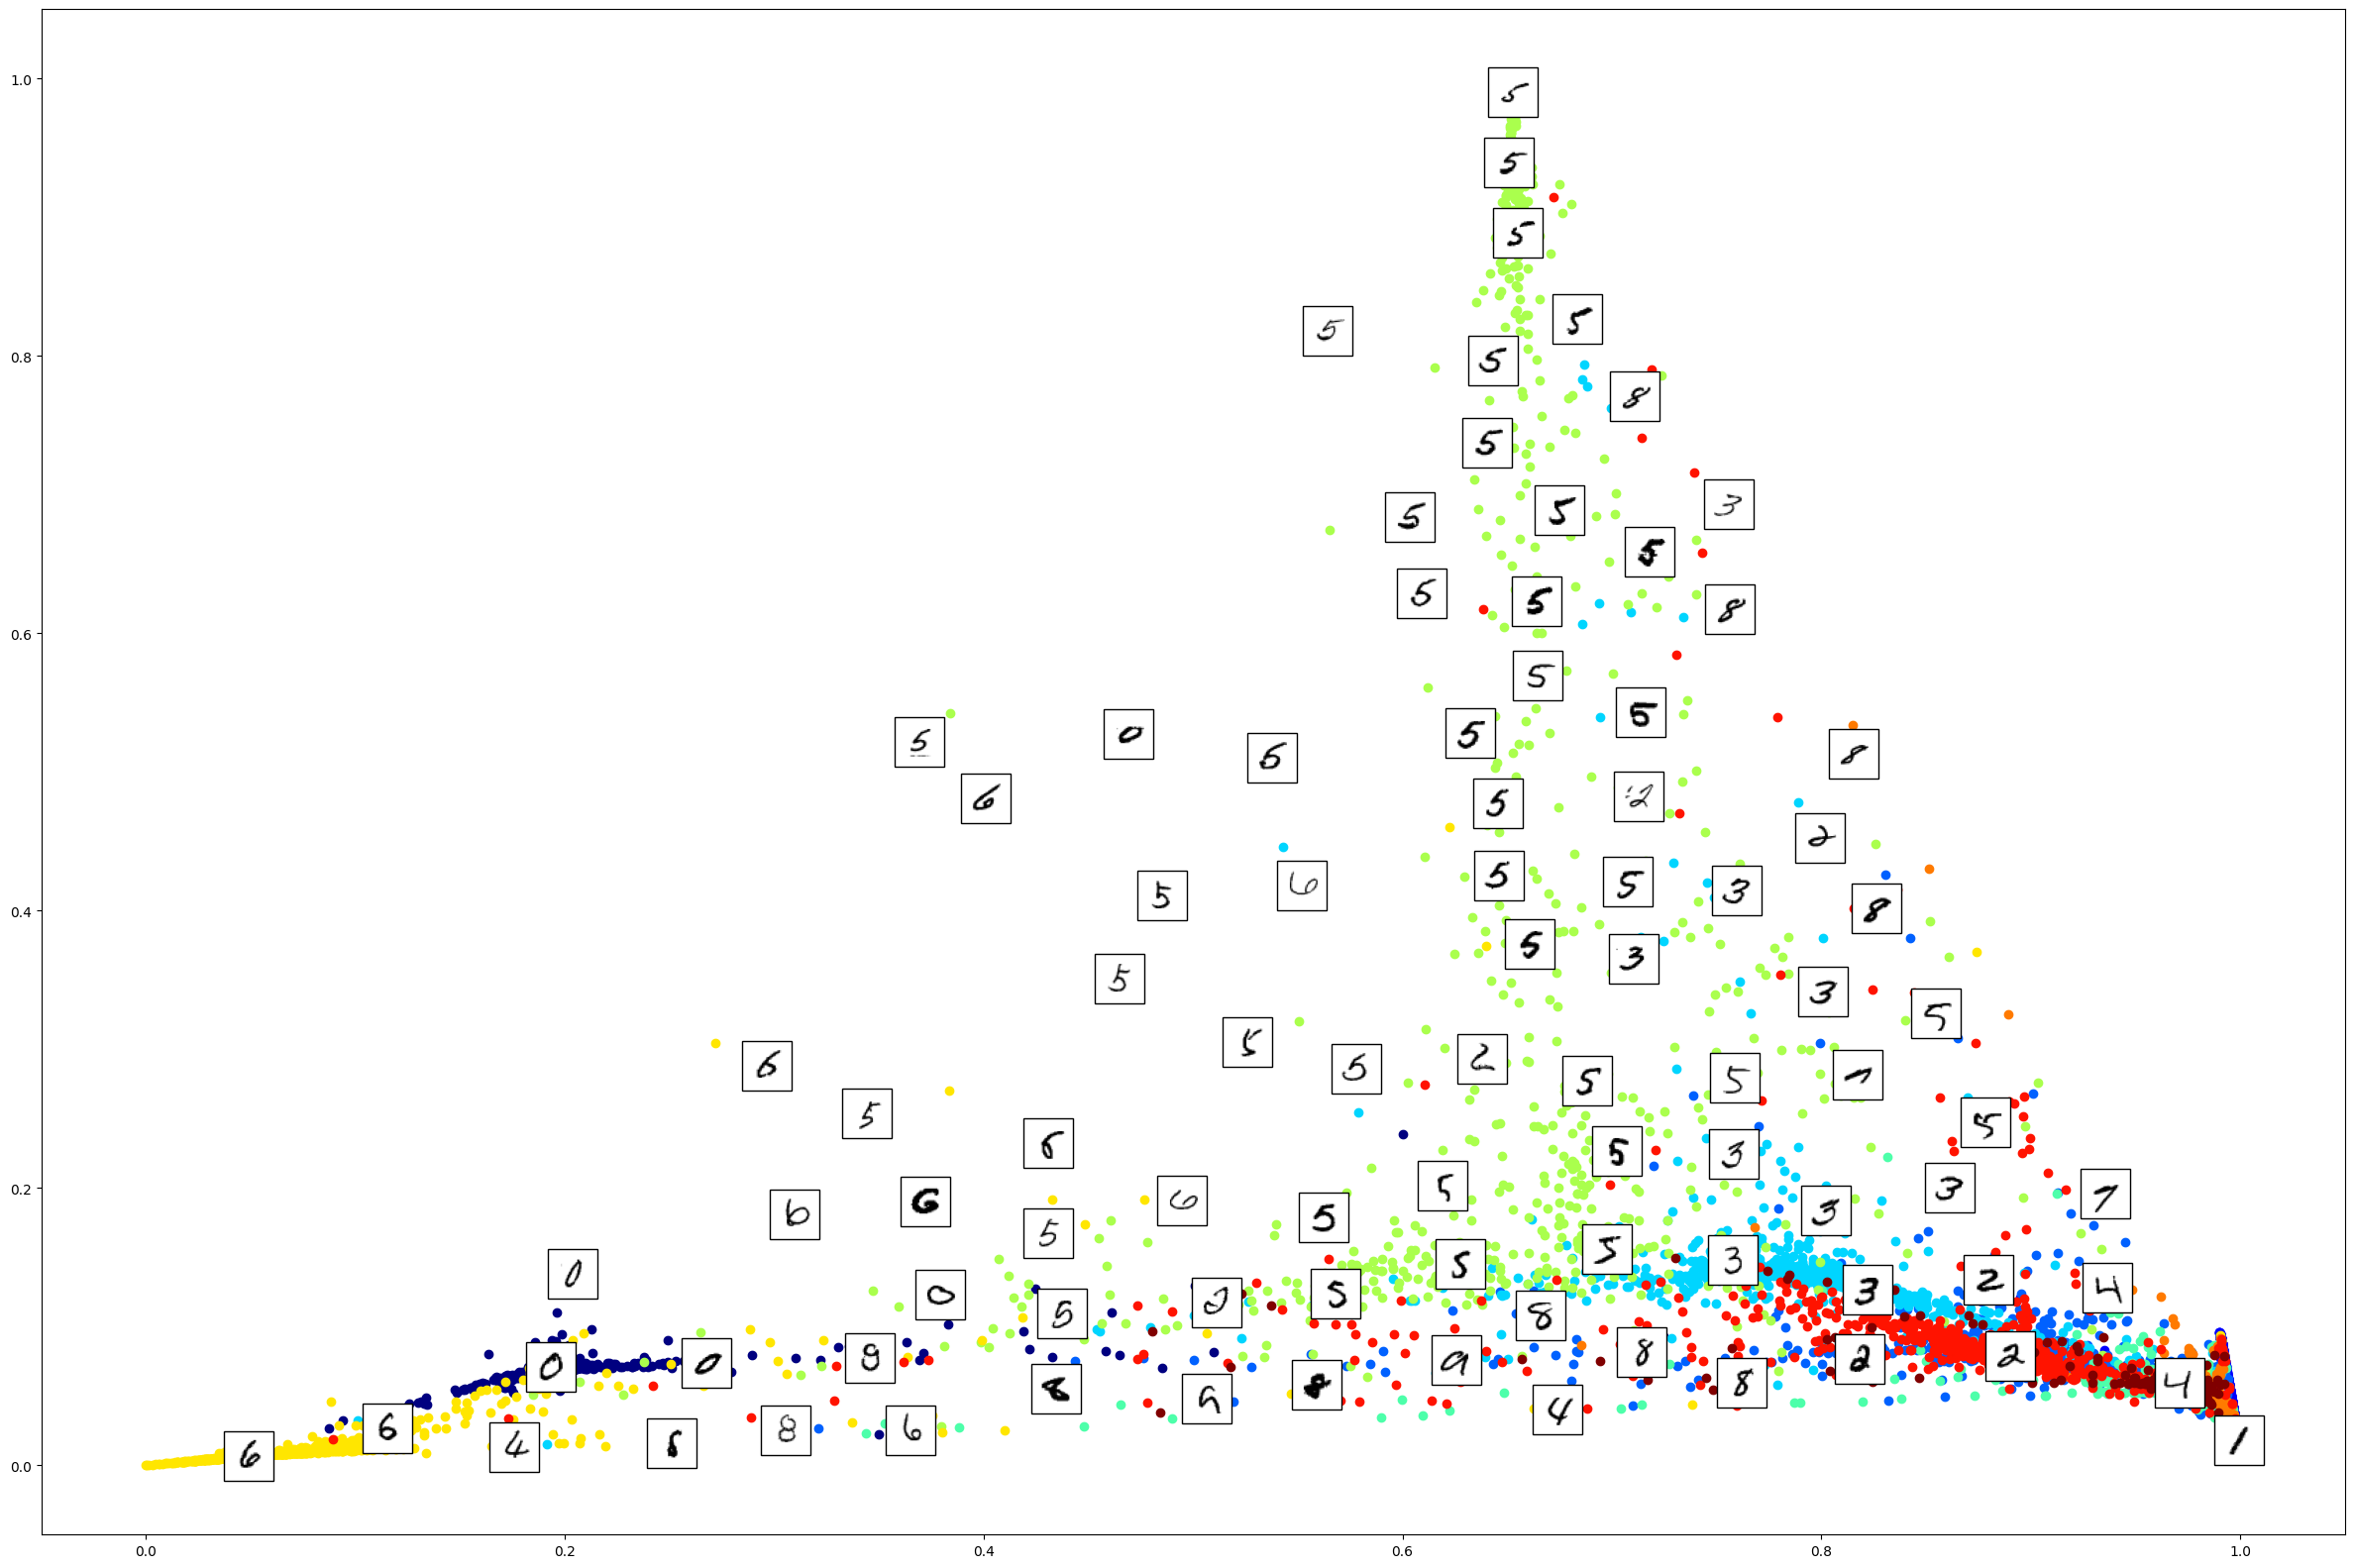

In [86]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

t0=time.time()
X_lle=LLE(n_components=2).fit_transform(X)
t1=time.time()
print("Time: {:.2f}".format(t1-t0))
plot_digits(X_lle,y, images=X, figsize=(30,20))

PCA+LLE took 30.1s.


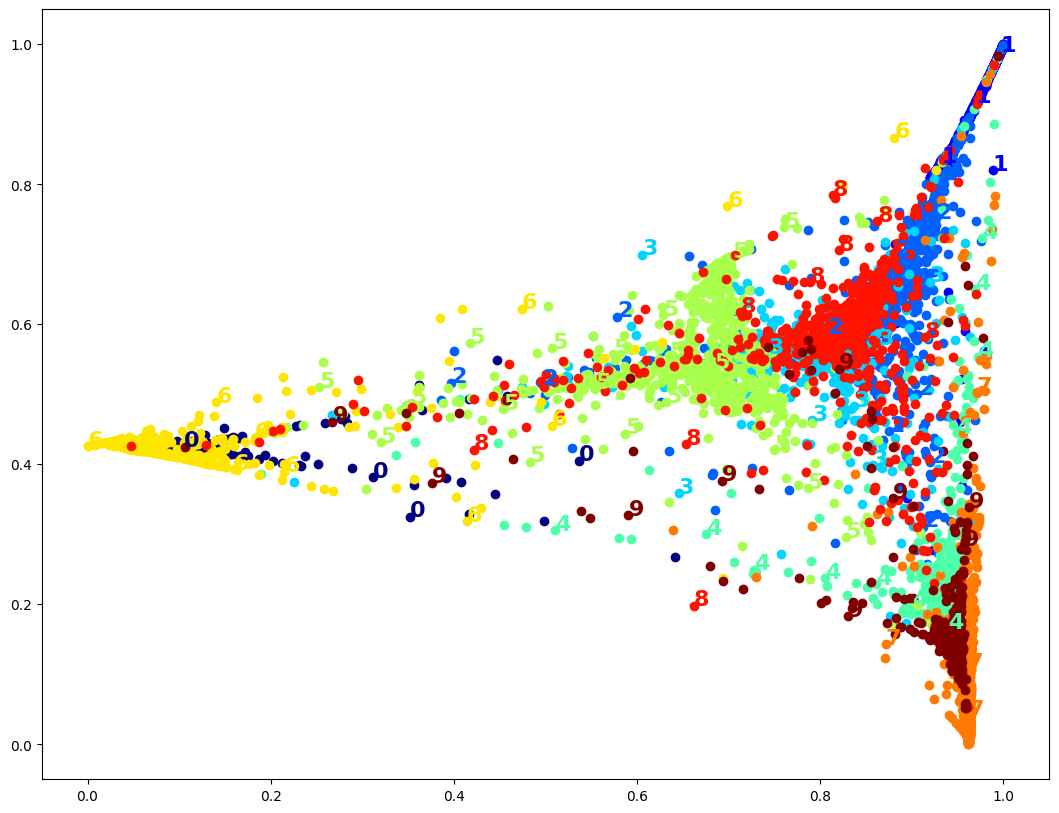

In [90]:
from sklearn.pipeline import Pipeline

pca_lle=Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LLE(n_components=2))
])

t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()


the same time, no actual advantage

In [93]:
from sklearn.manifold import MDS
t0 = time.time()
X_mds=MDS(n_components=2).fit_transform(X[:2000])
t1 = time.time()
print("MDS took {:.1f}s.".format(t1 - t0))
plt.show()

MDS took 122.8s.


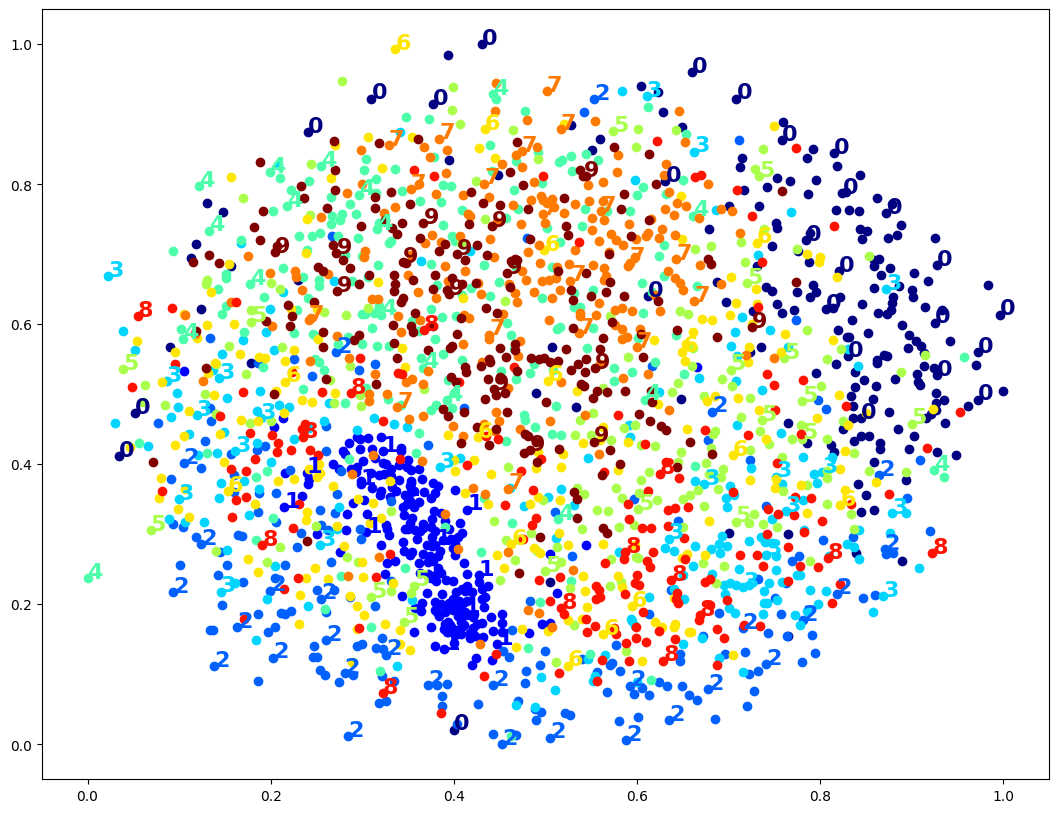

In [92]:
plot_digits(X_mds, y[:2000])

results are not too great, let use T-SNE with PCA to spped it up (PCA just takes the features that has the most variance, that is why it may be useful to speed up calculation sometimes!)


In [100]:
pca_tsne=Pipeline([
    ("pca", PCA(n_components=0.95)),
    ("tsne", TSNE(n_components=2)),
])
t0 = time.time()
X_pca_tnse=pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+tSNE took {:.1f}s.".format(t1 - t0))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA+tSNE took 56.3s.


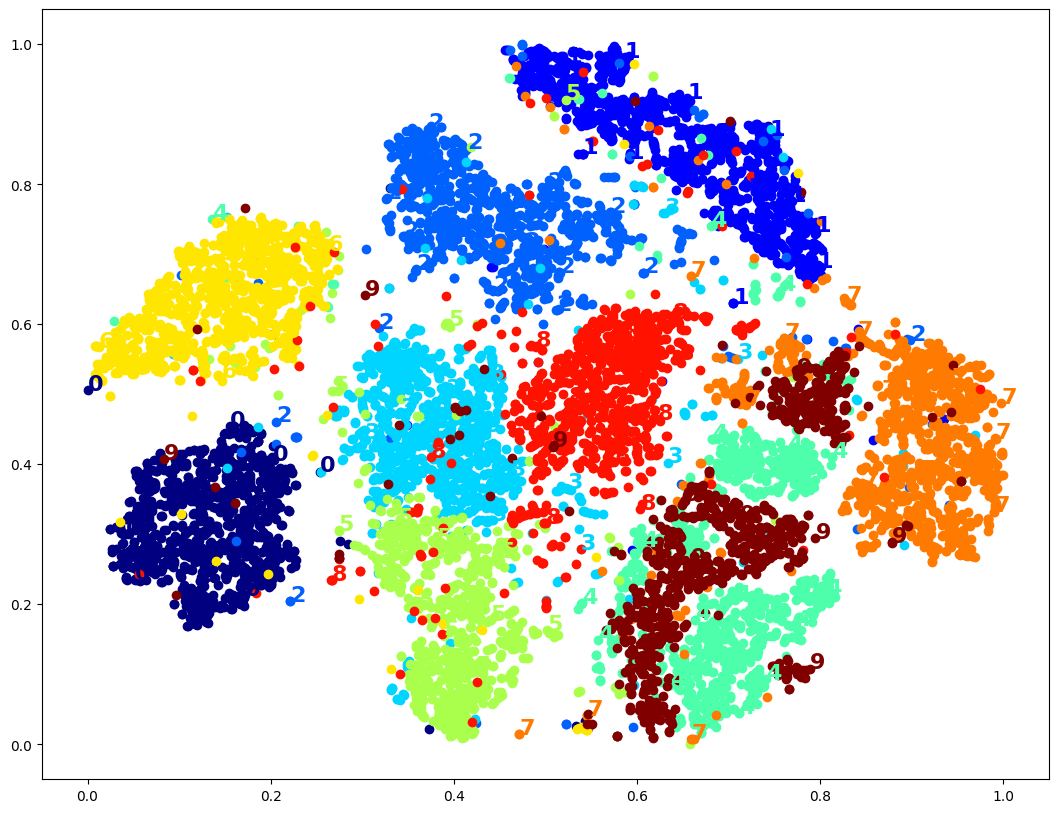

In [101]:
plot_digits(X_pca_tnse, y)